<Axes: >

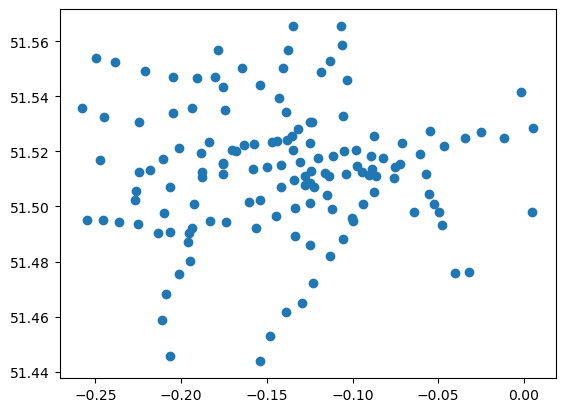

In [84]:
import geopandas as gpd
import numpy as np
df = gpd.read_file("./geojson/london_metro/london-underground.geojson")
#df = df[["name", "colour", "geometry"]]
#df = df[~df['name'].isnull()]
df.plot()

In [85]:
df

,name,cartodb_id,created_at,updated_at,geometry
0,Aldgate,1,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.07521 51.51439)
1,Aldgate East,2,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.07223 51.51538)
2,Aldwych,3,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.11592 51.51203)
3,Angel,4,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.10583 51.53265)
4,Archway,5,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.13492 51.56551)
...,...,...,...,...,...
136,Westminster,138,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.12477 51.50128)
137,White City,139,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.22447 51.51232)
138,Whitechapel,140,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.06087 51.5192)
139,Willesden Green,141,2014-12-25 00:30:17+00:00,2014-12-25 00:30:17+00:00,POINT (-0.22127 51.54915)


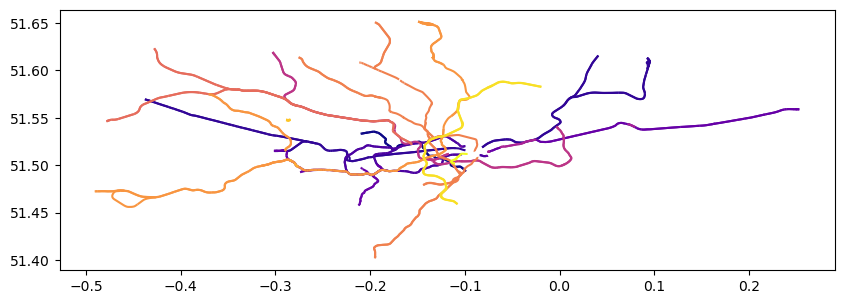

In [141]:
from cartes.osm import Overpass
from shapely.ops import linemerge
from shapely import MultiLineString
import pandas as pd
import matplotlib.pyplot as plt
import os

london_underground = Overpass.request(
    area={"name": "London", "as_": "london"},
    nwr=[dict(railway="subway", area="london")]
)

london_underground = london_underground.data.query("type_ == 'way' and name == name").assign(
    name=lambda df: df.name.str.split(" ", n=1, expand=True)[0]
)


def merge_line(elt):
    return pd.Series(
        {
            "line": elt['line'].tolist()[0],
            "geometry": MultiLineString(elt.geometry.tolist())
        }
    )
    
london_underground['name'] = london_underground['name'].str.replace(",", "")

london_underground = (
    london_underground[["name", "line", "geometry"]]
    .groupby("name").apply(merge_line).reset_index()
)

def conv_int_bool(string):
    try:
        int(string)
        return True
    except ValueError:
        return False

london_underground = london_underground[~london_underground['name'].apply(lambda x: conv_int_bool(x))].reset_index(drop=True)
cmap = plt.get_cmap('plasma', len(london_underground['name']))
colors = [cmap(i) for i in range(len(london_underground))]
london_underground['color'] = colors
london_underground.head(30)

fig, ax = plt.subplots(figsize=(10, 10))

#for idx, row in london_underground.iterrows():
#    ax.plot(row['geometry'], color=row['color'], label=row['name'])
london_underground.plot(ax=ax, color=london_underground['color'], label="name")
try: os.remove("./geojson/london_metro/test.geojson")
except OSError: london_underground.to_file("./geojson/london_metro/test.geojson")
#[london_underground["name"] == "Bakerloo"]

In [161]:
lu_2 = gpd.read_file("geojson\london_metro\export.geojson")
lu_2 = lu_2[["line", 'geometry']] #.head(20)
lu_2['line'] = lu_2['line'].str.split(";")
lu_2 = lu_2.explode("line", ignore_index=True)
lu_2['line'] = lu_2['line'].str.split(", ")
lu_2 = lu_2.explode("line", ignore_index=True)
lu_2['line'] = lu_2['line'].str.replace("&", "and")
lu_2 = lu_2[~lu_2['line'].isnull()]

def merge_line(elt):
    return pd.Series(
        {
            "geometry": MultiLineString(elt.geometry.tolist())
        }
    )
    
lu_2 = (
    lu_2[["line", "geometry"]]
    .groupby("line").apply(merge_line).reset_index()
)

line_colors = {
    "Bakerloo": "#B36305",
    "Central": "#E32017",
    "Circle": "#FFD300",
    "District": "#00782A",
    "Hammersmith and City": "#F3A9BB",
    "Jubilee": "#A0A5A9",
    "Metropolitan": "#9B0056",
    "Northern": "#000000",
    "Piccadilly": "#003688",
    "Victoria": "#0098D4",
    "Waterloo and City": "#95CDBA",
    "DLR": "#00A4A7",
    "Overground": "#EE7C0E",
    "Tramlink": "#84B817",
    "Cable Car": "#E21836",
    "Crossrail": "#7156A5"
}

lu_2['color'] = lu_2['line'].map(line_colors)

,line,geometry
0,Piccadilly,"MULTILINESTRING ((-0.10644 51.56281, -0.10673 ..."
1,Bakerloo,"MULTILINESTRING ((-0.1822 51.5222, -0.1819 51...."
2,Central,"MULTILINESTRING ((0.05394 51.63999, 0.05386 51..."
3,Circle,"MULTILINESTRING ((-0.22499 51.49368, -0.22517 ..."
4,District,"MULTILINESTRING ((-0.28816 51.51471, -0.28805 ..."
5,Hammersmith and City,"MULTILINESTRING ((-0.22499 51.49368, -0.22517 ..."
6,Jubilee,"MULTILINESTRING ((-0.00174 51.53888, -0.00204 ..."
7,Metropolitan,"MULTILINESTRING ((-0.1205 51.53053, -0.12078 5..."
8,Northern,"MULTILINESTRING ((-0.1862 51.61592, -0.18687 5..."
9,Northern Line,"MULTILINESTRING ((-0.08746 51.51091, -0.08731 ..."
